K-means clustering on the retail store customers based on their purchase history:

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [11]:
#Set environment variable to avoid memory leak warning
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [12]:
# Load the dataset
file_path = 'Mall_Customers.csv' 
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print("Step 1: Loaded Dataset")
display(data.head())

Step 1: Loaded Dataset


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
# Selecting the features for clustering
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Display the selected features
print("Step 2: Selected Features")
display(features.head())


Step 2: Selected Features


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [14]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert scaled features back to a dataframe for better visualization
scaled_features_df = pd.DataFrame(scaled_features, columns=['Annual Income (scaled)', 'Spending Score (scaled)'])

# Display the first few rows of the scaled features
print("Step 3: Scaled Features")
display(scaled_features_df.head())


Step 3: Scaled Features


,Annual Income (scaled),Spending Score (scaled)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Wi

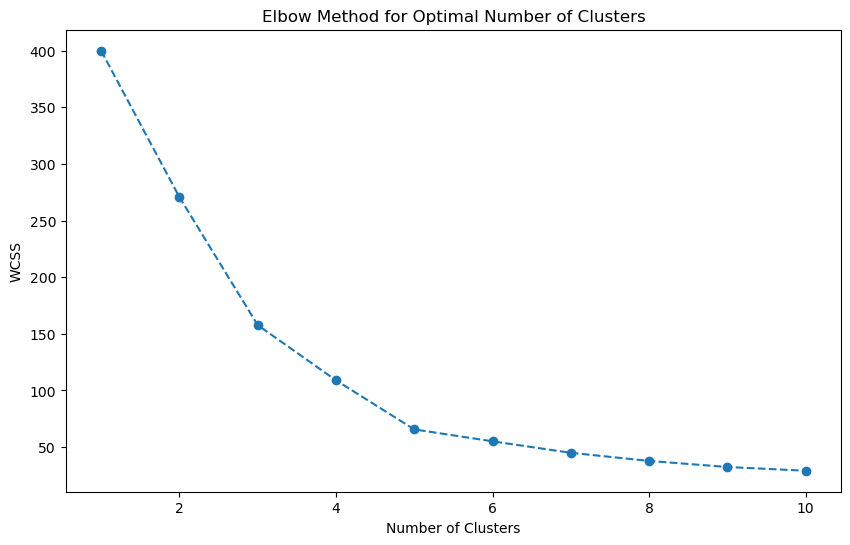

Step 4: WCSS Values
[400.0, 270.70426664306717, 157.70400815035947, 108.92131661364357, 65.56840815571682, 55.057348270386, 44.91118554999014, 37.73640346254161, 32.37525368158286, 29.090568897369717]


In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

print("Step 4: WCSS Values")
print(wcss)


In [16]:
# Apply K-means with the chosen number of clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original dataframe
data['Cluster'] = cluster_labels

# Display the first few rows of the data with cluster labels
print("Step 5: Data with Cluster Labels")
display(data.head())


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Step 5: Data with Cluster Labels


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


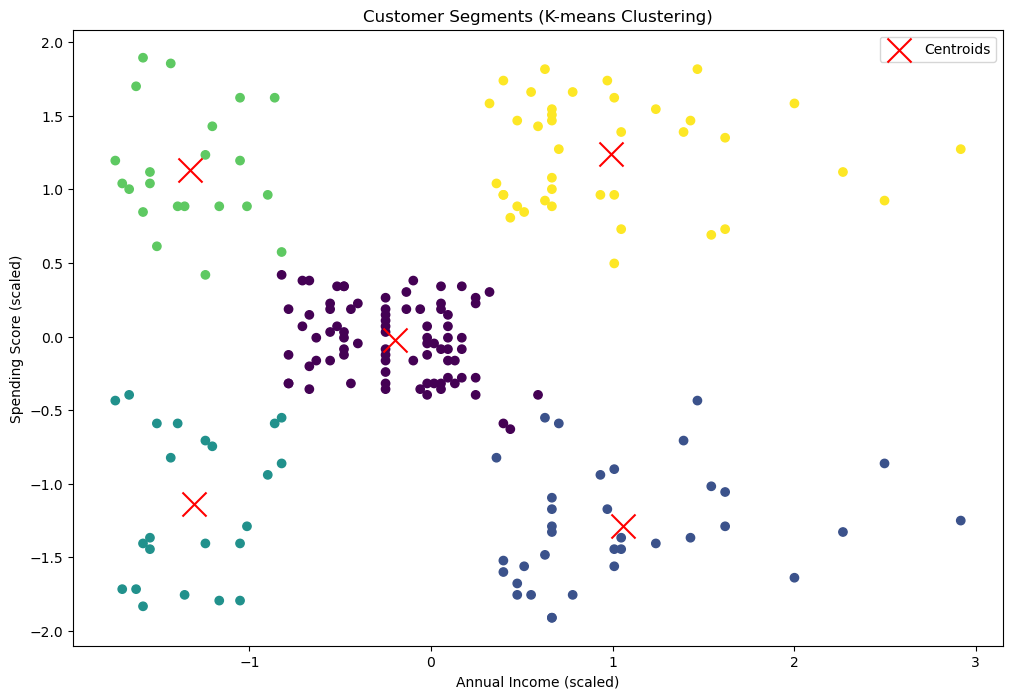

Step 6: Cluster Centers
[[-0.20091257 -0.02645617]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]
 [-1.32954532  1.13217788]
 [ 0.99158305  1.23950275]]


In [17]:
# Plot the clusters
plt.figure(figsize=(12, 8))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='x')
plt.title('Customer Segments (K-means Clustering)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

print("Step 6: Cluster Centers")
print(kmeans.cluster_centers_)


In [18]:
kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)